In [5]:
# These are all the modules we'll be using later. Make sure you can import them
# before proceeding further.
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import tarfile
from IPython.display import display, Image
from scipy import ndimage
from sklearn.linear_model import LogisticRegression
from six.moves.urllib.request import urlretrieve
from six.moves import cPickle as pickle

# Config the matplotlib backend as plotting inline in IPython
%matplotlib inline

In [6]:
num_classes=10
np.random.seed(133)
data_root='.'
train_filename= os.path.join(data_root, 'notMNIST_large.tar.gz') #join os root and extention(dataroot)
test_filename= os.path.join(data_root, 'notMNIST_small.tar.gz')

def maybe_extract(filename, force=False):
    root=os.path.splitext(os.path.splitext(filename)[0])[0] #splits the os root and extension 
    if os.path.isdir(root)and not force:
        print('%s already present - Skipping extraction of %s' %(root, filename))
    else:
        print('extracting data %s.this may take a while .please wait.' %root)
        tar=tarfile.open(filename)
        sys.stdout.flush()
        tar.extractall(data_root)
        tar.close()
    data_folders = [
        os.path.join(root, d)for d in sorted(os.listdir(root)) #listing all the classes directory
        if os.path.isdir(os.path.join(root, d))]
    if len(data_folders) !=num_classes: #checks lengths
        raise Exception(
            'Expected %d folders , one per class. found %d instead.' % (
                num_classes,len(data_folders)))
    print(data_folders)
    return data_folders
    
    
train_folders= maybe_extract(train_filename)
test_folders=maybe_extract(test_filename)
            
        
    
    
    

./notMNIST_large already present - Skipping extraction of ./notMNIST_large.tar.gz
['./notMNIST_large/A', './notMNIST_large/B', './notMNIST_large/C', './notMNIST_large/D', './notMNIST_large/E', './notMNIST_large/F', './notMNIST_large/G', './notMNIST_large/H', './notMNIST_large/I', './notMNIST_large/J']
./notMNIST_small already present - Skipping extraction of ./notMNIST_small.tar.gz
['./notMNIST_small/A', './notMNIST_small/B', './notMNIST_small/C', './notMNIST_small/D', './notMNIST_small/E', './notMNIST_small/F', './notMNIST_small/G', './notMNIST_small/H', './notMNIST_small/I', './notMNIST_small/J']


In [9]:
image_size=28 #pixel width and height
pixel_depth=255.0 #Nurmber of levels per pixel

def load_letter(folder, min_num_images):
    """Load the data for a single letter label"""
    image_files=os.listdir(folder)
    dataset=np.ndarray(shape=(len(image_files),image_size, image_size),dtype=np.float32)
    print(folder)
    num_images=0
    for image in image_files:
        image_file=os.path.join(folder,image)
        try:
            image_data=(ndimage.imread(image_file).astype(float) - pixel_depth /2)/pixel_depth
            if image_data.shape !=(image_size,image_size):
                raise Exception('Unexpected image shape: %s' % str(image_data.shape))
            dataset[num_images,:,:]=image_data
            num_images=num_images + 1
        except IOError as e:
            print('couldnot read :', image_file , ':', e , '-it\'s ok , skipping.')
    dataset=dataset[0:num_images, :, :]
    if num_images < min_num_images:
        raise Exception('many fewer images then expected: %d < %d' % (num_images, min_num_images))
    print('Full dataset tensor:', dataset.shape)
    print('mean:', np.mean(dataset))
    print('standard deviation:', np.std(dataset))
    return dataset

def maybe_pickle(data_folders, min_num_images_per_class, force=False):
    dataset_names=[]
    for folder in data_folders:
        set_filename=folder+ '.pickle'
        dataset_names.append(set_filename)
        if os.path.exists(set_filename)and not force:
            print('%s already present - skipping pickling.' % set_filename)
        else:
            print('pickling %s.' % set_filename)
            dataset=load_letter(folder,min_num_images_per_class)
            try:
                with open(set_filename, 'wb')as f:
                    pickle.dump(dataset,f, pickle.HIGHEST_PROTOCOL)
            except Exception as e:
                print('Unable to save data to', set_filename, ':',e)
    return dataset_names
train_datasets=maybe_pickle(train_folders, 45000)#Not MNIST Large
test_datasets=maybe_pickle(test_folders, 1800)#Not MNIST SMALL



./notMNIST_large/A.pickle already present - skipping pickling.
./notMNIST_large/B.pickle already present - skipping pickling.
./notMNIST_large/C.pickle already present - skipping pickling.
./notMNIST_large/D.pickle already present - skipping pickling.
./notMNIST_large/E.pickle already present - skipping pickling.
./notMNIST_large/F.pickle already present - skipping pickling.
./notMNIST_large/G.pickle already present - skipping pickling.
./notMNIST_large/H.pickle already present - skipping pickling.
./notMNIST_large/I.pickle already present - skipping pickling.
./notMNIST_large/J.pickle already present - skipping pickling.
./notMNIST_small/A.pickle already present - skipping pickling.
./notMNIST_small/B.pickle already present - skipping pickling.
./notMNIST_small/C.pickle already present - skipping pickling.
./notMNIST_small/D.pickle already present - skipping pickling.
./notMNIST_small/E.pickle already present - skipping pickling.
./notMNIST_small/F.pickle already present - skipping pi

(52909, 28, 28)
41480656
[[-0.5        -0.5        -0.5        -0.5        -0.5        -0.5        -0.5
  -0.5        -0.5        -0.5        -0.5        -0.48823529 -0.5
  -0.20588236  0.31568629 -0.44901961 -0.49607843 -0.49607843 -0.5        -0.5
  -0.5        -0.5        -0.5        -0.5        -0.5        -0.5        -0.5
  -0.5       ]
 [-0.5        -0.5        -0.5        -0.5        -0.5        -0.5        -0.5
  -0.5        -0.5        -0.5        -0.5        -0.49215686 -0.5
   0.21372549  0.5        -0.14313726 -0.5        -0.48823529 -0.5        -0.5
  -0.5        -0.5        -0.5        -0.5        -0.5        -0.5        -0.5
  -0.5       ]
 [-0.5        -0.5        -0.5        -0.5        -0.5        -0.5        -0.5
  -0.5        -0.5        -0.5        -0.48823529 -0.5        -0.30784315
   0.48039216  0.49607843  0.25294119 -0.5        -0.49607843 -0.5        -0.5
  -0.5        -0.5        -0.5        -0.5        -0.5        -0.5        -0.5
  -0.5       ]
 [-0.5     

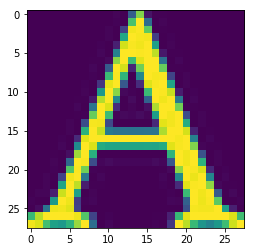

In [7]:

import matplotlib.image as mpimg
read_pickle = pickle.load( open( "notMNIST_large/A.pickle", "rb" ) )
print (read_pickle.shape)
print (read_pickle.size)
#print (read_pickle)
print (read_pickle[0])
imgplot = plt.imshow(read_pickle[0])


In [19]:
def make_arrays(nb_rows, img_size):
    if nb_rows:
        dataset=np.ndarray((nb_rows, img_size , img_size), dtype=np.float32)
        labels=np.ndarray(nb_rows,dtype=np.float32)
    else:
        dataset,labels=None, None
    return dataset,labels
def merge_datasets(pickle_files,train_size, valid_size=0):
    num_classes= len(pickle_files)
    valid_dataset, valid_labels= make_arrays(valid_size, image_size)#for validation 
    train_dataset, train_labels= make_arrays(train_size, image_size)
    vsize_per_class= valid_size // num_classes
    tsize_per_class= train_size // num_classes
    
    start_v,start_t =0 , 0
    end_v, end_t =vsize_per_class , tsize_per_class
    end_l=vsize_per_class+tsize_per_class
    for label, pickle_file in enumerate(pickle_files):#label=value or index of pickle files,example A,B,C,D
        try:
            with open(pickle_file, 'rb') as f:
                letter_set=pickle.load(f)
                #shuffle the letters to have random validation and training set
                np.random.shuffle(letter_set)
                if valid_dataset is not None:
                    valid_letter=letter_set[:vsize_per_class, : , :]
                    valid_dataset[start_v:end_v, : , :] = valid_letter
                    valid_labels[start_v:end_v]= label
                    start_v +=vsize_per_class
                    end_v += vsize_per_class
                    
                train_letter= letter_set[vsize_per_class:end_l, :, :]
                train_dataset[start_t:end_t, : ,:]=train_letter
                train_labels[start_t:end_t]=label
                start_t +=tsize_per_class
                end_t += tsize_per_class
        except Exception as e:
            print('unable to process data from', pickle_file, '.', e)
            raise
    return valid_dataset,valid_labels,train_dataset, train_labels

train_size= 200000
valid_size=10000
test_size=10000

valid_dataset, valid_labels,train_dataset,train_labels = merge_datasets(train_datasets, train_size , valid_size)
_, _, test_dataset, test_labels=merge_datasets(test_datasets,test_size)

print('training: ' ,train_dataset.shape , train_labels.shape)
print('validation :' , valid_dataset.shape , valid_labels.shape)
print('test :', test_dataset.shape , test_labels.shape)
                    
                
    
        

training:  (200000, 28, 28) (200000,)
validation : (10000, 28, 28) (10000,)
test : (10000, 28, 28) (10000,)


In [31]:
def randomize(dataset, labels):
    permutation = np.random.permutation(labels.shape[0])
    print (labels.shape[0])
    print (permutation)
    shuffled_dataset= dataset[permutation, : , :]
    shuffled_labels= labels[permutation]
    return shuffled_dataset, shuffled_labels
train_dataset , train_labels = randomize(train_dataset, train_labels)
test_dataset , test_labels = randomize(test_dataset, test_labels)
valid_dataset , valid_labels = randomize(valid_dataset, valid_labels)

    
    


200000
[ 68123  68900  37991 ..., 173740  61878 164379]
10000
[4625 4363 1278 ..., 5277  230 7092]
10000
[2276 9308 7388 ..., 3026 9803 2236]


7.0


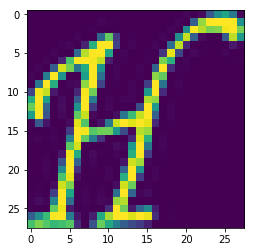

In [32]:
imgplot = plt.imshow(train_dataset [0])
print (train_labels[0])

In [37]:
pickle_file = os.path.join(data_root, 'notMNIST.pickle')
try:
    f = open(pickle_file , 'wb')
    save= {
        'train_dataset' : train_dataset,
        'train_labels'  : train_labels,
        'valid_dataset' : valid_dataset,
        'valid_labels'  : valid_labels,
        'test_dataset'  : test_dataset,
        'test_label'    : test_labels,
    }
    pickle.dump(save, f , pickle.HIGHEST_PROTOCOL)
    f.close()
except Exception as e:
    print('unable to save data to', pickle_file , ':', e)
    raise

In [39]:
statinfo= os.stat(pickle_file)
print('compressed pickcle size:', statinfo.st_size)

compressed pickcle size: 690800405
